In [1]:
import pandas as pd

In [2]:
import sqlite3

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
import seaborn as sns

In [5]:
con = sqlite3.connect("clues.db")

In [6]:
jeopardy_data = pd.read_sql("SELECT clues.id, clues.game, airdate, round, value, category, clue, answer FROM clues JOIN airdates ON clues.game = airdates.game JOIN documents ON clues.id = documents.id JOIN classifications ON clues.id = classifications.clue_id JOIN categories ON classifications.category_id = categories.id", con)

In [7]:
jeopardy_data.value = jeopardy_data.value.apply(lambda x: x if isinstance(x, int) else x.replace(',', '')).astype(int)

In [8]:
jeopardy_data.head(20)

,id,game,airdate,round,value,category,clue,answer
0,1,1,2004-09-06,1,200,THE OLD TESTAMENT,"Let's all flock to read Psalm 95, in which hum...",sheep
1,2,1,2004-09-06,1,200,SEAN SONG,"The rap on him is he's sometimes ""Puffy""",Sean Combs
2,3,1,2004-09-06,1,200,CITY WALK,In the 1980s this city passed Chicago as the U...,Los Angeles
3,4,1,2004-09-06,1,200,SLOGANEERING,"""Ask any mermaid you happen to see, 'What's th...",Chicken of the Sea
4,5,1,2004-09-06,1,200,ROOM,"Many people have become familiar with ""Shape"",...",magazines
5,6,1,2004-09-06,1,200,"""BOARD""","In 2003, Roy E. Disney left it after being on ...",the Disney Board of Directors
6,7,1,2004-09-06,1,400,THE OLD TESTAMENT,Some say the screech owl in the King James Bib...,Adam
7,8,1,2004-09-06,1,400,SEAN SONG,Once married to Madonna,Sean Penn
8,9,1,2004-09-06,1,400,CITY WALK,"This London borough is the G in GMT, squire",Greenwich
9,10,1,2004-09-06,1,400,SLOGANEERING,"A fast food chain: ""If it doesn't get all over...",Carl's Jr.


In [9]:
jeopardy_data.count()

id          330563
game        330563
airdate     330563
round       330563
value       330563
category    330563
clue        330563
answer      330563
dtype: int64

In [10]:
jeopardy_data.isnull().sum()

id          0
game        0
airdate     0
round       0
value       0
category    0
clue        0
answer      0
dtype: int64

In [11]:
jeopardy_data["round"].value_counts()

1    163522
2    161484
3      5557
Name: round, dtype: int64

Hypothesis/Problem Statement: In this analysis I am going to be looking at historical Jeopardy data to determine which topics appear most frequently and are the most valuable. I hypothesize that history will be the most frequent and valuable topic.

In [12]:
jeopardy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330563 entries, 0 to 330562
Data columns (total 8 columns):
id          330563 non-null int64
game        330563 non-null int64
airdate     330563 non-null object
round       330563 non-null int64
value       330563 non-null int64
category    330563 non-null object
clue        330563 non-null object
answer      330563 non-null object
dtypes: int64(4), object(4)
memory usage: 20.2+ MB


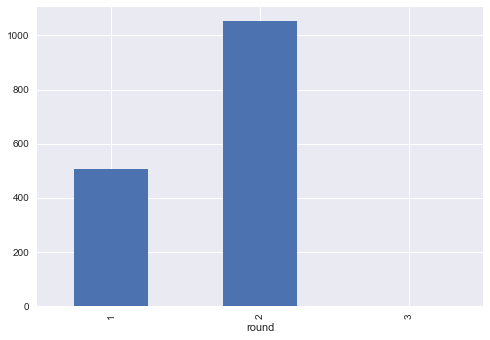

In [13]:
jeopardy_data.groupby("round").value.mean().plot(kind = "bar")


In [14]:
description = jeopardy_data.groupby("round").sum()

In [15]:
description

,id,game,value
round,,,
1,27024942901,465094751,82988043
2,26690549795,459257579,169776367
3,920621070,15839056,0


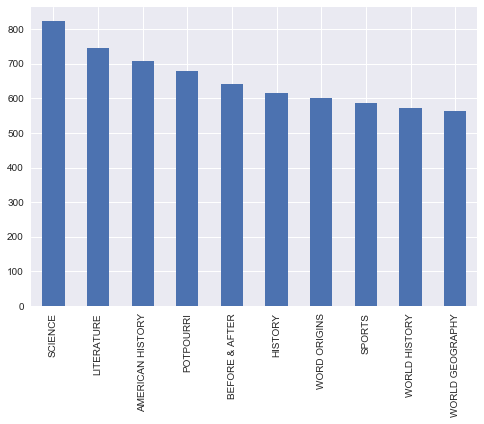

In [16]:
jeopardy_data.category.value_counts().head(10).plot(kind="bar")

In [17]:
category_values = jeopardy_data.groupby("category").sum().sort(columns = "value", ascending = False).head(10)

/Users/nehasrivatsa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


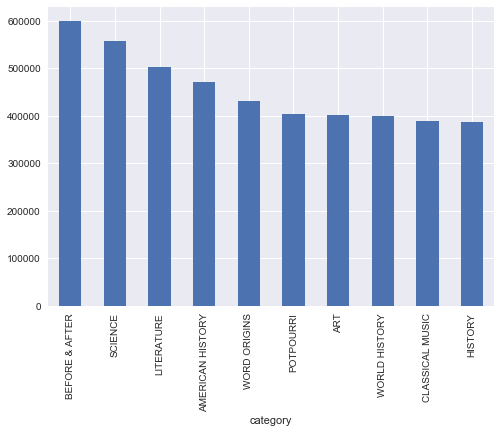

In [18]:
category_values["value"].plot(kind = "bar")

In [19]:
jeopardy_data["clue"].nunique()

328942

In [20]:
jeopardy_data["category"].nunique()

39929

In [21]:
duplicate_clues = jeopardy_data.clue.value_counts()
final_dups = duplicate_clues[duplicate_clues >1]

In [22]:
final_dups

=                                                                                                       277
...                                                                                                      22
-                                                                                                        20
[video clue]                                                                                             19
[audio clue]                                                                                             19
[instrumental]                                                                                            5
[sports logo]                                                                                             5
[State outline]                                                                                           5
Egypt                                                                                                     5
(audio clue)                

In [23]:
final_dups.head()

=               277
...              22
-                20
[video clue]     19
[audio clue]     19
Name: clue, dtype: int64

In [9]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "[video clue]"]

In [10]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "[audio clue]"]

In [11]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "[theme music]"]

In [12]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "[instrumental]"]

In [13]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "[sports logo]"]

In [14]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "[State outline]"]

In [15]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "[audio]"]

In [16]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "[Music plays]"]

In [17]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "[flag]"]

In [18]:
jeopardy_data = jeopardy_data[jeopardy_data["clue"] != "(audio clue)"]

In [19]:
jeopardy_data.count()

id          330487
game        330487
airdate     330487
round       330487
value       330487
category    330487
clue        330487
answer      330487
dtype: int64

In [35]:
jeopardy_data["value"].value_counts(330487).head()

400     0.194177
800     0.151513
200     0.135491
1000    0.100098
600     0.094261
Name: value, dtype: float64

The dataset includes 330K rows of data, each a unique jeopardy question. I will be analyzing the text data of the questions to identify category clusters and use that for my analysis.

In [19]:
# Unicode Handling
from __future__ import unicode_literals

## Load spacy

from spacy.en import English
nlp_toolkit = English()
nlp_toolkit

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

import gensim
from gensim.models.word2vec import Word2Vec

from nltk.cluster import KMeansClusterer, euclidean_distance, kmeans

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, auc

from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus

from scipy import cluster

import matplotlib.pyplot as plt
% matplotlib inline

from scipy.sparse import hstack

import sklearn.linear_model

from sklearn import grid_search, cross_validation

import wordcloud

/Users/nehasrivatsa/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nehasrivatsa/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
jeopardy_datause = jeopardy_data[:75000]

In [49]:
jeopardy_datause.clue = jeopardy_datause.clue.apply(lambda x: x.encode('utf8'))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 77: ordinal not in range(128)

In [55]:
jeopardy_datause[[77]]

IndexError: indices are out-of-bounds

In [21]:
jeopardy_titles = jeopardy_datause["clue"]

In [22]:
tfidfvectorized = TfidfVectorizer(max_features = 1000, 
                                 ngram_range= (1, 2), 
                                 stop_words = "english")

tfidfvectorized.fit(jeopardy_titles)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=u'english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [23]:
title_features = tfidfvectorized.transform(jeopardy_titles)

In [39]:
id2word = dict(enumerate(countvectorized.get_feature_names()))

In [40]:
corpus = Sparse2Corpus(title_features, documents_columns = False)

In [41]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=15)

In [42]:
num_topics = 15
n_words_per_topic = 10
for ti, topic in enumerate(lda_model.show_topics(num_topics = num_topics, num_words = n_words_per_topic)):
    print("Topic: %d" % (ti)) 
    print (topic)
    print()

Topic: 0
(0, u'0.026*"human" + 0.025*"lower" + 0.024*"town" + 0.023*"league" + 0.021*"political" + 0.020*"left" + 0.020*"highest" + 0.020*"000" + 0.019*"military" + 0.019*"built"')
()
Topic: 1
(1, u'0.033*"university" + 0.030*"olympics" + 0.026*"father" + 0.026*"games" + 0.025*"1996" + 0.020*"roman" + 0.019*"went" + 0.019*"american" + 0.018*"leader" + 0.018*"12"')
()
Topic: 2
(2, u'0.050*"medical" + 0.038*"work" + 0.036*"playing" + 0.030*"body" + 0.028*"sound" + 0.026*"began" + 0.025*"word" + 0.025*"mark" + 0.024*"greatest" + 0.023*"earth"')
()
Topic: 3
(3, u'0.043*"person" + 0.035*"green" + 0.034*"senator" + 0.021*"creature" + 0.019*"year" + 0.018*"works" + 0.018*"hits" + 0.017*"memorial" + 0.017*"blue" + 0.017*"nation"')
()
Topic: 4
(4, u'0.033*"picture" + 0.028*"got" + 0.028*"rome" + 0.027*"starred" + 0.024*"william" + 0.022*"did" + 0.020*"isn" + 0.019*"won" + 0.019*"comedy" + 0.017*"california"')
()
Topic: 5
(5, u'0.037*"newspaper" + 0.033*"days" + 0.028*"kelly" + 0.026*"use" + 0.0

In [36]:
countvectorized = CountVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english',
                             binary=True)

countvectorized.fit(jeopardy_titles)

CountVectorizer(analyzer=u'word', binary=True, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=u'english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [37]:
count_features = countvectorized.transform(jeopardy_titles)

In [24]:
tfidfstack = hstack([title_features]).toarray()

In [25]:
words = np.array(tfidfvectorized.get_feature_names())

In [26]:
tfidfs = title_features/float(title_features.max()) 

In [34]:
from PIL import Image, ImageDraw, ImageFont

In [33]:
img_grey = Image.new("L", (8, 3))
draw = ImageDraw.Draw(img_grey)

In [35]:
font = ImageFont.truetype('/Library/Fonts/Verdana.ttf')

In [36]:
draw.setfont(font)

/Users/nehasrivatsa/anaconda/lib/python2.7/site-packages/PIL/ImageDraw.py:100: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


In [38]:
from wordcloud import WordCloud

In [47]:
wordcloud = WordCloud(max_words = 1000,
                      font_path = "/Library/Fonts/Verdana.ttf",
                     relative_scaling = 1.0,
                     stopwords = "english",
                     ).generate(jeopardy_datause["clue"])

TypeError: descriptor 'lower' requires a 'str' object but received a 'unicode'

In [38]:
countstack = hstack([count_features]).toarray()

In [65]:


allstack = hstack([title_features, count_features]).toarray()

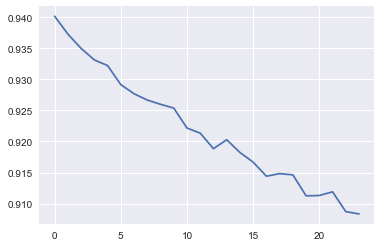

In [29]:
initial = [cluster.vq.kmeans(tfidfstack,i) for i in range(1,25)]
plt.plot([var for (cent,var) in initial])
plt.show()

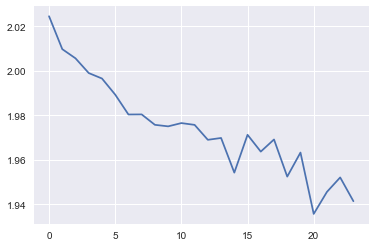

In [30]:
initial = [cluster.vq.kmeans(allstack,i) for i in range(1,25)]
plt.plot([var for (cent,var) in initial])
plt.show()

In [25]:
tfidfclusterer = KMeans(n_clusters = 15, n_init = 10)
tfidfclusterer.fit(tfidfstack)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
tfidfclusters = tfidfclusterer.labels_.tolist()

In [27]:
len(tfidfclusters)

75000

In [48]:
countclusterer = KMeans(n_clusters = 30, n_init = 10)
countclusterer.fit(countstack)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
countclusters = countclusterer.labels_.tolist()

In [ ]:
allclusterer = KMeans(n_clusters = 15, n_init = 10)
allclusterer.fit(allstack)

In [130]:
allclusters = allcusterer.labels_.tolist()

NameError: name 'allcusterer' is not defined

In [50]:
series1 = pd.Series(countclusters)

In [28]:
series = pd.Series(tfidfclusters)

In [29]:
jeopardy_datause["category_label"] = series

/Users/nehasrivatsa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
jeopardy_datause_dummies = jeopardy_datause.join(pd.get_dummies(jeopardy_datause["category_label"]))

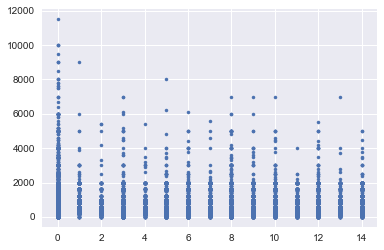

In [31]:
plt.plot(jeopardy_datause.category_label, jeopardy_datause.value, '.')

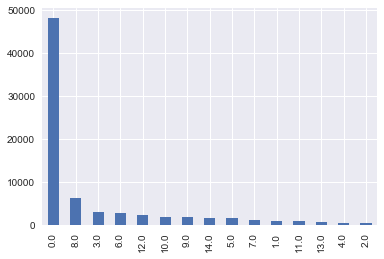

In [32]:
jeopardy_datause.category_label.value_counts().plot(kind="bar")

In [91]:
temp_jeopardy = jeopardy_datause.ix[(jeopardy_datause["category_label"]== 0.0)]
temp_jeopardy["clue"].str.split().value_counts()

[Mrs., Antonio, Banderas]                                                                                                                                                                                          2
[The, Hubert, H., Humphrey, Metrodome]                                                                                                                                                                             2
[It, makes, the, sound, heard, here:]                                                                                                                                                                              2
["Oh,, God!"]                                                                                                                                                                                                      2
[Wake, Island]                                                                                                                                      

In [124]:
grouped = jeopardy_datause['value'].groupby(jeopardy_datause['category_label'])

In [125]:
grouped.mean()

category_label
0.0    671.095775
1.0    672.174633
2.0    657.389620
3.0    643.101055
4.0    698.773946
Name: value, dtype: float64

In [33]:
train = jeopardy_datause_dummies[:73500]

In [34]:
test = jeopardy_datause_dummies[73500:]

In [35]:
import statsmodels.formula.api as smf

X = train[["round"], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
y = train['value']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=train).fit()
#print the full summary
lm.summary()

TypeError: unhashable type: 'list'

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [105]:
X = train[["round",0, 1, 2, 3, 4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16, 17, 18, 19]]
y = train['value']

In [109]:
RFRModel = RandomForestRegressor(n_estimators = 20)
RFRModel.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [110]:
features = X.columns
feature_importances = RFRModel.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
0,round,0.995062
3,2,0.000611
4,3,0.000494
15,14,0.000419
1,0,0.000404


In [112]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(RFRModel, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

auc_scores = {}
for n_trees in range(1, 100, 10):
    RFRModel = RandomForestRegressor(n_estimators = n_trees)
    scores = cross_val_score(RFRModel, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))
    auc_scores[n_trees] = scores.mean()
pd.Series(auc_scores, name='AUC Scores').plot();

ValueError: multiclass format is not supported

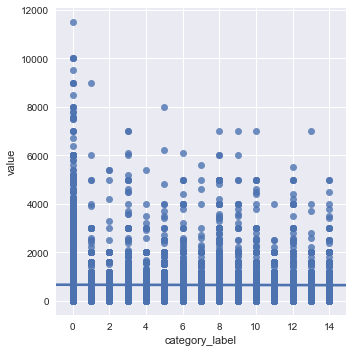

In [43]:
sns.lmplot('category_label', 'value', jeopardy_datause);